<a href="https://colab.research.google.com/github/varuchi09/Music-popularity-prediction/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING MODULES**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# **LOADING DATASET**

In [30]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# **SHIFTING COLUMN**

In [31]:
cols = (list(df.columns))
cols

['genre',
 'artist_name',
 'track_name',
 'track_id',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

In [32]:
col_to_move = cols.pop(4)
cols.insert(17, col_to_move)
df = df[cols]
df.head()

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,3
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,4


# **GETTING INSIGHTS FROM THE DATASET**

In [33]:
df.shape  # ROWS AND COLUMNS

(232725, 18)

In [34]:
df.size   # NUMBER OF ELEMENTS

4189050

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   acousticness      232725 non-null  float64
 5   danceability      232725 non-null  float64
 6   duration_ms       232725 non-null  int64  
 7   energy            232725 non-null  float64
 8   instrumentalness  232725 non-null  float64
 9   key               232725 non-null  object 
 10  liveness          232725 non-null  float64
 11  loudness          232725 non-null  float64
 12  mode              232725 non-null  object 
 13  speechiness       232725 non-null  float64
 14  tempo             232725 non-null  float64
 15  time_signature    232725 non-null  object 
 16  valence           23

In [36]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917,41.127502
std,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065,18.189948
min,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000,0.000000
25%,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000,29.000000
50%,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000,43.000000
75%,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000,55.000000
max,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000,100.000000


In [37]:
df.isnull()

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232721,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232722,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232723,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

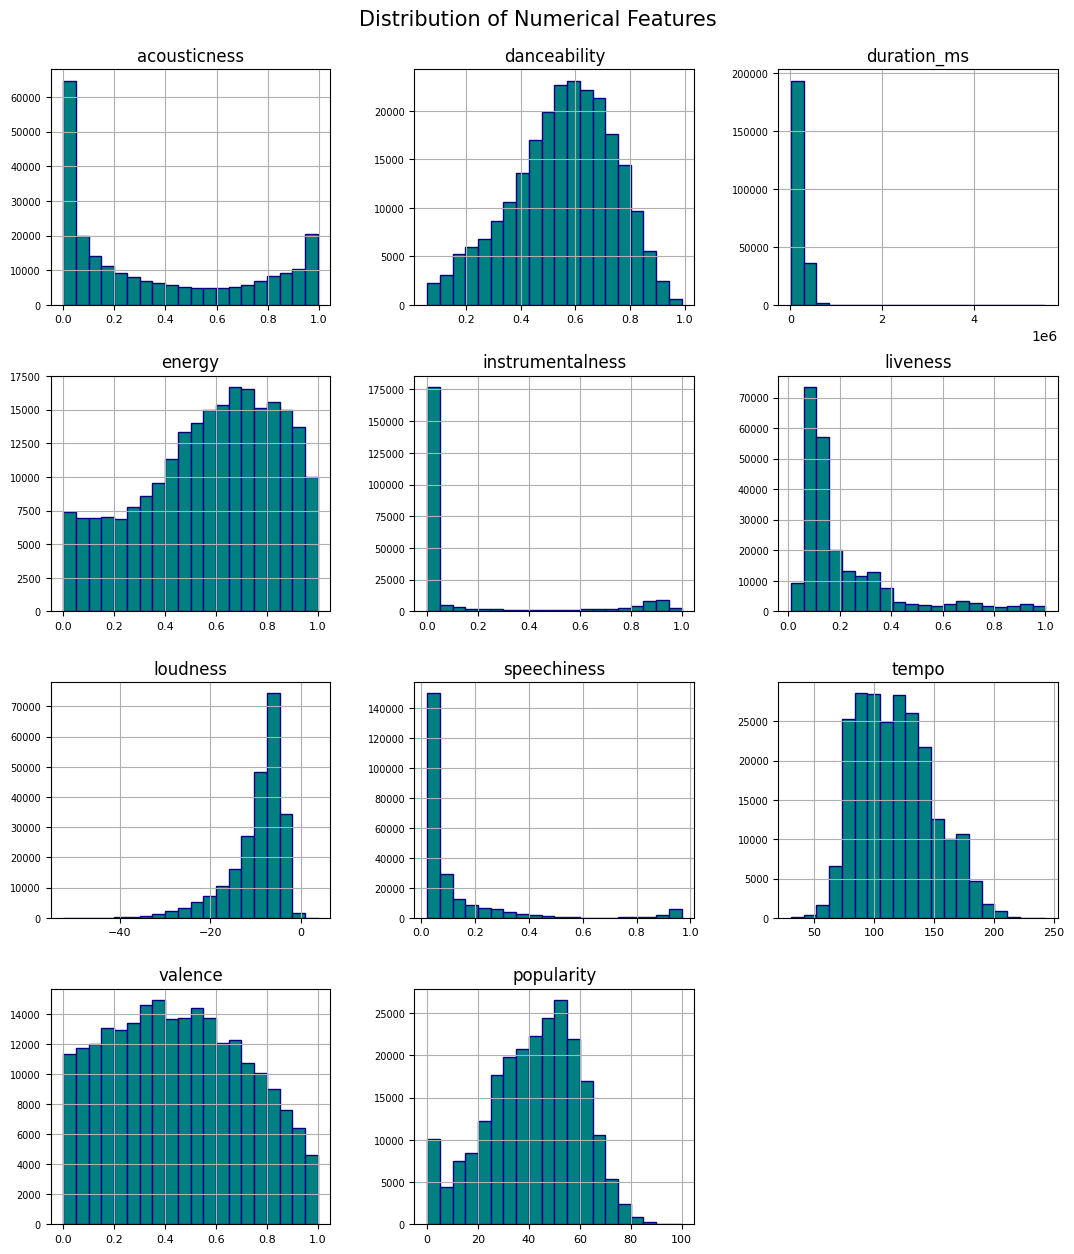

In [39]:
df.hist(figsize = (13, 15), bins = 20, xlabelsize = 8, ylabelsize = 7, color = 'teal', edgecolor = 'navy')
plt.suptitle("Distribution of Numerical Features",fontsize = 15, y = 0.92)
plt.show()

# **HANDLING MISSING VALUES**

In [40]:
# df = df.fillna(method = "ffill") # no need to fill anything as there are no null values
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

# EDA

In [ ]:
nominal_cols = ['genre','artist_name','track_name','key','mode','time_signature']
encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(df[nominal_cols])
print(encoded_cols)

# nominal_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(nominal_cols))
print(nominal_df)

MemoryError: Unable to allocate 283. GiB for an array with shape (232725, 163225) and data type float64

# **INDEPENDENT (x) and DEPENDENT VARIABLE (y)**

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x)
print(y)

        genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  acousticness  danceability  duration_ms  \


# **SPLITTING THE DATASET INTO TRAINING AND TESTING SETS**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

                   genre               artist_name  \
139926         Reggaeton             Justin Quiles   
160602         Reggaeton             Boy Wonder CF   
93667              Indie           Yeah Yeah Yeahs   
16096              Dance             Janelle Monáe   
159668         Reggaeton                     Los 4   
...                  ...                       ...   
175638            Comedy            Sarah Millican   
95816              Indie                  Bad Suns   
203245        Soundtrack             John Williams   
100879  Children’s Music                 Disturbed   
89256            Hip-Hop  Rage Against The Machine   

                                               track_name  \
139926                                          Confusion   
160602  Atrévete (feat. Wisin y Yandel & Franco el Gor...   
93667                                                Maps   
16096           I Got The Juice (feat. Pharrell Williams)   
159668                                 Brindem

# **TRAINING THE MODEL**

In [ ]:
model = Ridge()
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Reggaeton'

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

ValueError: could not convert string to float: 'Hip-Hop'

# **CHECKING THE ACCURACY**

In [ ]:
score = r2_score(y_test, y_pred)
print(score)

NameError: name 'y_pred' is not defined

# **VISUALISATION**

NameError: name 'y_pred' is not defined

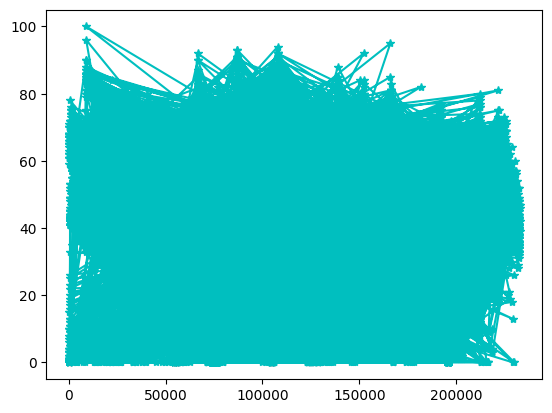

In [36]:
plt.plot(y_test, label = 'Actual', marker = '*', color = 'c')
plt.plot(y_pred, label = 'Predicted', color = 'y')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.show()

ValueError: could not convert string to float: 'Movie'